In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [4]:
df = pd.read_csv('combine.csv')

In [5]:
df.head()

,Month,.MMAX,.MMIN,..TMRF,.RH -0830,.RH -1730,dengue
0,1/1/2010,29.0,13.7,1.5,57,32,21
1,1/2/2010,32.0,15.9,0.0,52,26,15
2,1/3/2010,38.1,21.5,0.0,51,19,24
3,1/4/2010,41.7,25.9,0.0,56,22,45
4,1/5/2010,43.8,28.8,0.0,58,18,28


In [6]:
from sklearn.model_selection import train_test_split
df = df['dengue']
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)


In [7]:
train_data.head()

0    21
1    15
2    24
3    45
4    28
Name: dengue, dtype: int64

In [8]:
# prompt: scale the data using use min max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data.values.reshape(-1, 1))
scaled_test = scaler.transform(test_data.values.reshape(-1, 1))
print(  scaled_test)

[[4.81586402e-02]
 [6.09065156e-02]
 [3.96600567e-02]
 [3.96600567e-02]
 [3.11614731e-02]
 [2.54957507e-02]
 [7.64872521e-02]
 [3.17280453e-01]
 [9.78753541e-01]
 [1.60339943e+00]
 [4.03682720e-01]
 [1.50141643e-01]
 [2.83286119e-03]
 [5.66572238e-03]
 [2.83286119e-03]
 [5.66572238e-03]
 [5.66572238e-03]
 [0.00000000e+00]
 [8.49858357e-03]
 [1.41643059e-03]
 [1.27478754e-02]
 [3.96600567e-02]
 [5.24079320e-02]
 [2.26628895e-02]
 [7.08215297e-03]
 [0.00000000e+00]
 [2.83286119e-03]
 [1.41643059e-03]
 [7.08215297e-03]
 [2.83286119e-03]
 [4.24929178e-03]
 [2.83286119e-03]
 [9.91501416e-03]
 [3.96600567e-02]
 [2.26628895e-02]
 [1.55807365e-02]
 [1.27478754e-02]
 [9.91501416e-03]
 [0.00000000e+00]
 [7.08215297e-03]
 [7.08215297e-03]
 [2.83286119e-03]
 [2.83286119e-03]
 [8.49858357e-03]
 [2.83286119e-03]
 [1.27478754e-02]
 [3.54107649e-02]
 [2.40793201e-02]
 [1.41643059e-03]
 [0.00000000e+00]
 [1.41643059e-03]
 [1.41643059e-03]
 [2.83286119e-03]
 [2.83286119e-03]
 [2.83286119e-03]
 [4.249291

In [9]:
# prompt: ensure stationarity of the data

from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Apply ADF test to the training data
adf_test(train_data)

# If the p-value is greater than 0.05, the data is not stationary.
# You can difference the data to make it stationary.
# Example of differencing:

train_data_diff = train_data.diff().dropna()
adf_test(train_data_diff)
    # Apply the same differencing to test data if needed
test_data_diff = test_data.diff().dropna()

    # Rescale the differenced data
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data_diff.values.reshape(-1, 1))
scaled_test = scaler.transform(test_data_diff.values.reshape(-1, 1))
scaled_test

Results of Dickey-Fuller Test:
Test Statistic                  -4.805690
p-value                          0.000053
#Lags Used                      22.000000
Number of Observations Used    937.000000
Critical Value (1%)             -3.437348
Critical Value (5%)             -2.864630
Critical Value (10%)            -2.568415
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.300857e+01
p-value                        2.596497e-24
#Lags Used                     2.100000e+01
Number of Observations Used    9.370000e+02
Critical Value (1%)           -3.437348e+00
Critical Value (5%)           -2.864630e+00
Critical Value (10%)          -2.568415e+00
dtype: float64


array([[ 0.51877934],
       [ 0.49061033],
       [ 0.50821596],
       [ 0.50117371],
       [ 0.50352113],
       [ 0.55046948],
       [ 0.70774648],
       [ 1.05633803],
       [ 1.0258216 ],
       [-0.48591549],
       [ 0.29812207],
       [ 0.38615023],
       [ 0.51056338],
       [ 0.50586854],
       [ 0.51056338],
       [ 0.50821596],
       [ 0.50352113],
       [ 0.51525822],
       [ 0.50234742],
       [ 0.51760563],
       [ 0.53051643],
       [ 0.51877934],
       [ 0.48356808],
       [ 0.49530516],
       [ 0.50234742],
       [ 0.51056338],
       [ 0.50704225],
       [ 0.5129108 ],
       [ 0.50469484],
       [ 0.50938967],
       [ 0.50704225],
       [ 0.51408451],
       [ 0.53286385],
       [ 0.49413146],
       [ 0.50234742],
       [ 0.50586854],
       [ 0.50586854],
       [ 0.5       ],
       [ 0.51408451],
       [ 0.50821596],
       [ 0.50469484],
       [ 0.50821596],
       [ 0.5129108 ],
       [ 0.50352113],
       [ 0.51643192],
       [ 0

In [10]:
# prompt: use auto arima to find the optimum p d and q values

!pip install pmdarima

from pmdarima import auto_arima

# Assuming 'train_data_diff' is your differenced and scaled training data
# Replace with your actual differenced and scaled training data
# Example:
# train_data_diff = ...  # Your differenced training data

# Find the optimal (p, d, q) values using auto_arima
stepwise_fit = auto_arima(train_data_diff, trace=True, suppress_warnings=True)

# Print the optimal parameters
print(stepwise_fit.summary())

# Access the optimal (p, d, q) values
p = stepwise_fit.order[0]
d = stepwise_fit.order[1]
q = stepwise_fit.order[2]
print(f"Optimal p: {p}, d: {d}, q: {q}")

  Using cached Cython-3.0.11-py2.py3-none-any.whl.metadata (3.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 209.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 575.9 kB/s eta 0:00:00a 0:00:01
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10127.343, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10070.127, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10030.740, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10125.343, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10026.939, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=10013.651, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0

In [11]:
# prompt: train an arima model on the scaled_train and make predictions

from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model
model = ARIMA(scaled_train, order=(1,0,2)) # Example order, you might need to tune this
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(scaled_train), end=len(scaled_train) + len(scaled_test) - 1)

# Inverse transform the predictions to the original scale
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

#Print predictions
predictions

array([[ 4.28430455],
       [12.95985183],
       [ 7.30185863],
       [ 4.11676045],
       [ 2.32374833],
       [ 1.31439406],
       [ 0.7461904 ],
       [ 0.42632708],
       [ 0.24626394],
       [ 0.14489959],
       [ 0.08783777],
       [ 0.05571551],
       [ 0.03763268],
       [ 0.02745317],
       [ 0.02172274],
       [ 0.01849686],
       [ 0.0166809 ],
       [ 0.01565862],
       [ 0.01508314],
       [ 0.01475918],
       [ 0.01457682],
       [ 0.01447415],
       [ 0.01441636],
       [ 0.01438383],
       [ 0.01436551],
       [ 0.0143552 ],
       [ 0.0143494 ],
       [ 0.01434613],
       [ 0.01434429],
       [ 0.01434326],
       [ 0.01434268],
       [ 0.01434235],
       [ 0.01434216],
       [ 0.01434206],
       [ 0.014342  ],
       [ 0.01434197],
       [ 0.01434195],
       [ 0.01434194],
       [ 0.01434193],
       [ 0.01434193],
       [ 0.01434193],
       [ 0.01434193],
       [ 0.01434193],
       [ 0.01434192],
       [ 0.01434192],
       [ 0

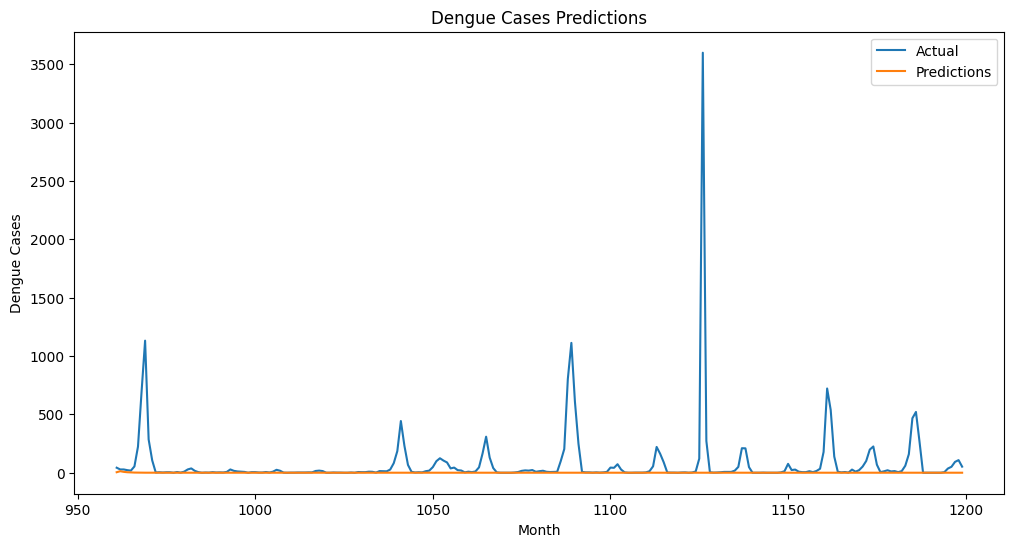

In [12]:
# prompt: plot predictions

import matplotlib.pyplot as plt

# Adjust the index of the test data to match the predictions length
# by removing the first element
adjusted_test_data_index = test_data.index[1:]

# Plot the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(adjusted_test_data_index, test_data.values[1:], label='Actual') # Adjust data values accordingly
plt.plot(adjusted_test_data_index, predictions, label='Predictions')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.title('Dengue Cases Predictions')
plt.show()

In [14]:
# prompt: calculate accuracy of the predictions

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data.values[1:], predictions))
print(f'RMSE: {rmse}')

# Calculate MAE
mae = mean_absolute_error(test_data.values[1:], predictions)
print(f'MAE: {mae}')

#Calculate Accuracy
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(actual, predicted):
    return np.mean(np.abs(percentage_error(np.asarray(actual), np.asarray(predicted)))) * 100

accuracy = 100 - mape(test_data.values[1:], predictions)

print(f"Accuracy: {accuracy:.2f}%")

RMSE: 286.4179022247525
MAE: 77.02739825221866
Accuracy: 13.32%


/var/folders/hy/c9fsrtk13m5_2f8g0rlyl2qr0000gn/T/ipykernel_5341/3715227916.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[j] = (actual[j] - predicted[j]) / actual[j]
/var/folders/hy/c9fsrtk13m5_2f8g0rlyl2qr0000gn/T/ipykernel_5341/3715227916.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  res[j] = predicted[j] / np.mean(actual)
